##3.2 Changing view angles
Here we will experiment with different sun and viewing angles using a couple of birch trees

In [1]:
%reload_ext autoreload
import os
import numpy as np
from run_start import *
from hips2img import *
%matplotlib inline

##Changing view angle in <code><span style="background-color:lightgrey">camera/simple.camera</span></code>
Options that were changed to create the following example are:

<code>geometry.zenith</code> in the below example this has been modified to 70$^{\circ}$.

<code>geometry.lookAt</code> changes the centre of the image, here this has been changed to <code>[0, 3, 1.5]</code> (x, y, z)

<code>results.image</code> and <code>result.integral</code> were also updated to prevent previous experiments being over written

start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 -6.396926 4.920201 focalLength: 0.400000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


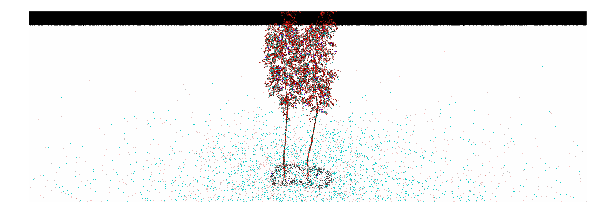

In [8]:
cmd = "echo 14 camera/camera_birches.dat light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/a_pair_of_birch_trees.obj"
error = run_start(cmd)

if not error:
    # here we create a false colour NIR image by reordering the bands, stretch is
    # therefore also turned off.
    hips2img('output/2birches.hips', stretch=False, order=[3, 1, 2])

##Changing the camera option <code>geometry.perspective</code>
Changing this option in <code><span style="background-color:lightgrey">camera.dat</span></code> changes the persepctive of the image.

In [7]:
from generate_camera_file import camera

this camera exists, overwrite? (y/n)y
start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 -6.396926 4.920201 focalLength: 0.400000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


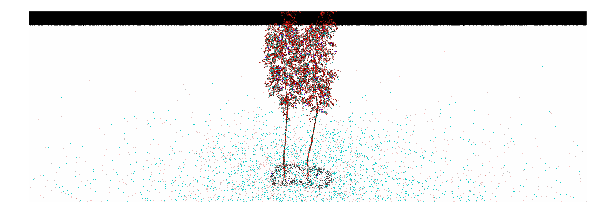

In [8]:
camera_fname = 'camera/perspectiveFALSE.camera'
output_name = camera(camera_fname,
                     geometry_options={'geometry.zenith':70,
                                       'geometry.lookAt':[0, 3, 1.5],
                                       'geometry.idealArea':25,
                                       'geometry.perspective':False},
                     results_options={'oname':'output/persepctive.test'})

cmd = "echo 14 {} light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands \
       wb/waveband.dat obj/a_pair_of_birch_trees.obj".format(camera_fname)

error = run_start(cmd)

if not error:
    hips2img(output_name + '.hips', stretch=False, order=[3, 1, 2])

##Changing illumination parameters in <code><span style="background-color:lightgrey">light/simple.light</span></code>

For an illumination source, azimuth and zenith geometry can be changed using the <code>geometry.zenith</code> and <code>geometry.aziumth</code> variables respectively. Below we generate two plots from azimuth angles of 0 and 180.

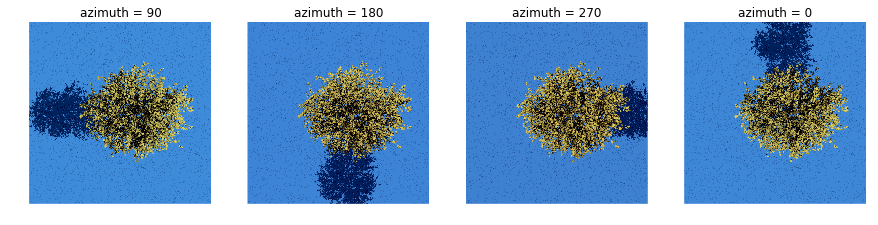

In [41]:
plt.figure(figsize=(15, 3.75))

camera_fname = 'camera/simple.camera'
light_fname = 'light/simple.light'

cmd = "echo 14 {} {} | \
       start -RATm 5 -RATsensor_wavebands \
       wb/waveband.dat obj/birch_tree_scene.obj"

for i, azimuth in enumerate([0, 90, 180, 270]):
    
    im = update_existing_camera(camera_fname, 
                                camera_fname + '.temp'.format(azimuth),
                                new_options={'result.image':'output/azimuth.temp.hips'.format(azimuth),
                                             'geometry.idealArea':4})
    
    update_existing_camera(light_fname,
                           light_fname + '.temp',
                           new_options={'geometry.azimuth':azimuth,
                                        'geometry.zenith':20})
    
    error = run_start(cmd.format(camera_fname + '.temp', light_fname + '.temp'))
    
    if not error:
        ax = hips2img(im, stretch=True, ax=plt.subplot(1, 4, i), imshow=False)
        ax.set_title('azimuth = {}'.format(azimuth))